# Домашнее задание 1 <br> Солодова Олеся

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
df = pd.read_csv('Iris.csv')

In [246]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [247]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [248]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


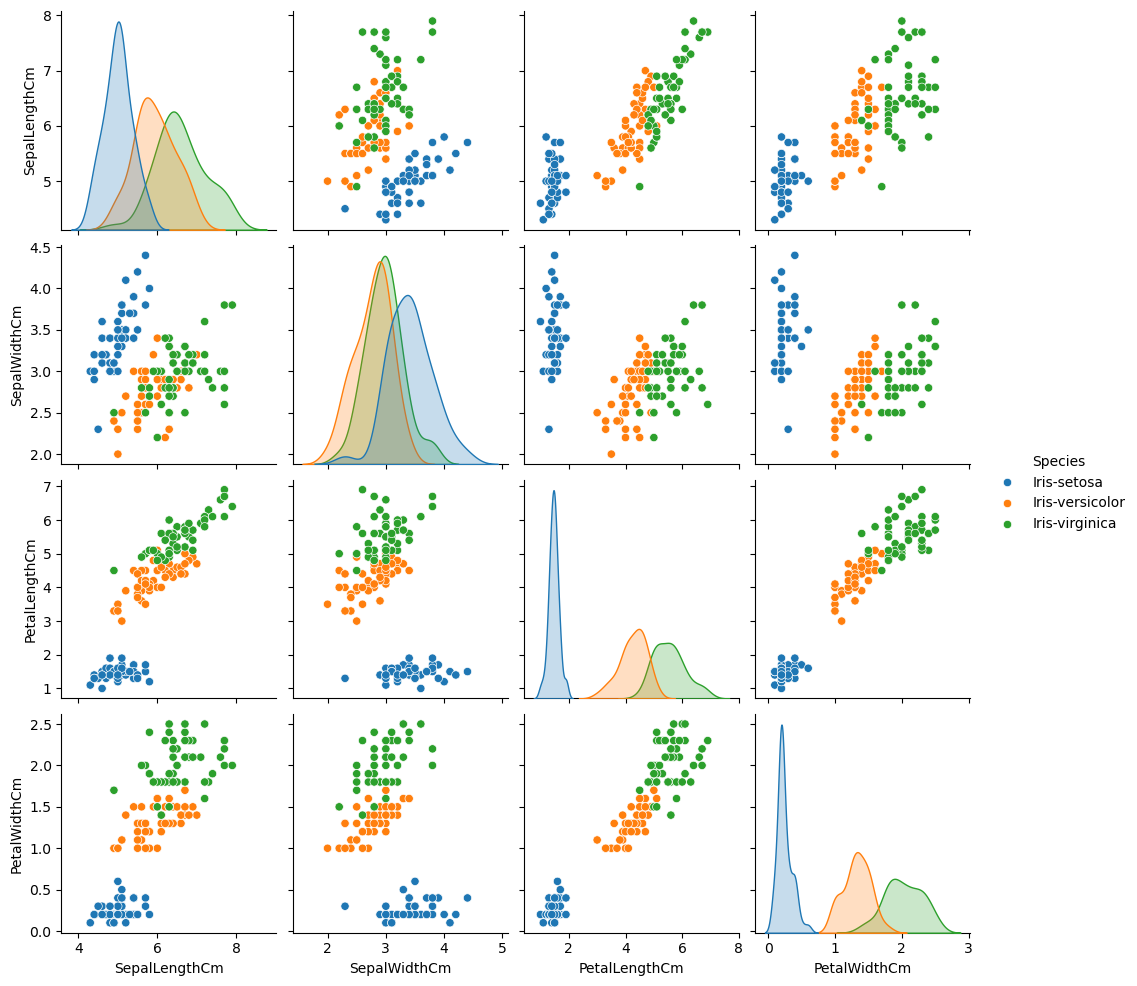

In [249]:
sns.pairplot(data=df,vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], hue='Species')

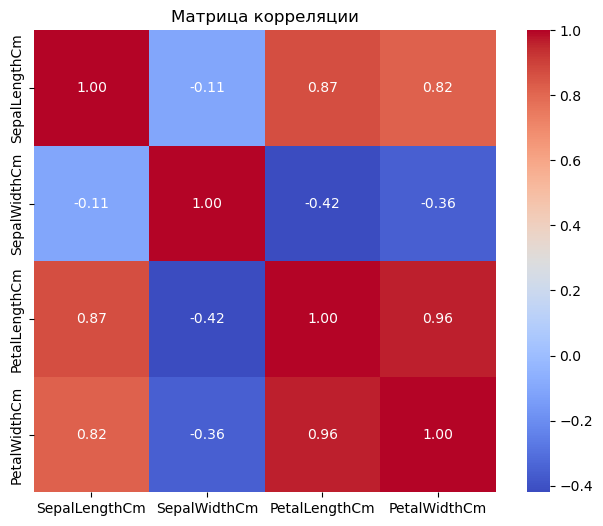

In [250]:
numerical_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Матрица корреляции')
plt.show()

In [251]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# Разбиение на обучающий и тестовый наборы данных, масштабирование данных, обучение модели

In [252]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = df[feature_columns].values
y = df['Species'].values

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [254]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [255]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [256]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


# Построение модели с помощью классов

In [257]:
import numpy as np
from collections import Counter

class KNearestNeighbors:
    def __init__(self, k=3, metric='euclidean'):
        self.k = k
        self.metric = metric
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        Stores the training data.
        """
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        return self
        
    def predict(self, X_test):
        """
        Vectorized prediction for better performance.
        """
        X_test = np.array(X_test)
        predictions = np.array([self._predict_single(x) for x in X_test])
        return predictions
    
    def _predict_single(self, x):
        """
        Optimized prediction for single instance.
        """
        # Векторизованное вычисление расстояний
        if self.metric == 'euclidean':
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        else:  # manhattan
            distances = np.sum(np.abs(self.X_train - x), axis=1)
        
        # Находим k ближайших соседей
        k_indices = np.argpartition(distances, self.k)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        
        # Находим наиболее частую метку
        unique, counts = np.unique(k_nearest_labels, return_counts=True)
        return unique[np.argmax(counts)]
    
    def score(self, X_test, y_test):
        """
        Returns accuracy score.
        """
        y_pred = self.predict(X_test)
        return accuracy_score(y_test, y_pred)


In [258]:
knn2 = KNearestNeighbors(k=5)
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_test)

In [259]:
accuracy = knn2.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")
print(f"Predictions: {y_pred[:10]}") 
print(f"True labels: {y_test[:10]}")  

Accuracy: 0.9667
Predictions: [2 1 0 2 0 2 0 1 1 1]
True labels: [2 1 0 2 0 2 0 1 1 1]


# GrisSearch

In [260]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [261]:
knn = KNeighborsClassifier()

In [262]:
param_grid = {'n_neighbors': list(range(1, 30))}  

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=make_scorer(accuracy_score))
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']

print(f"Best k: {best_k}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy with best k: {test_accuracy:.4f}")

Best k: 12
Best cross-validation score: 0.9667
Test accuracy with best k: 1.0000


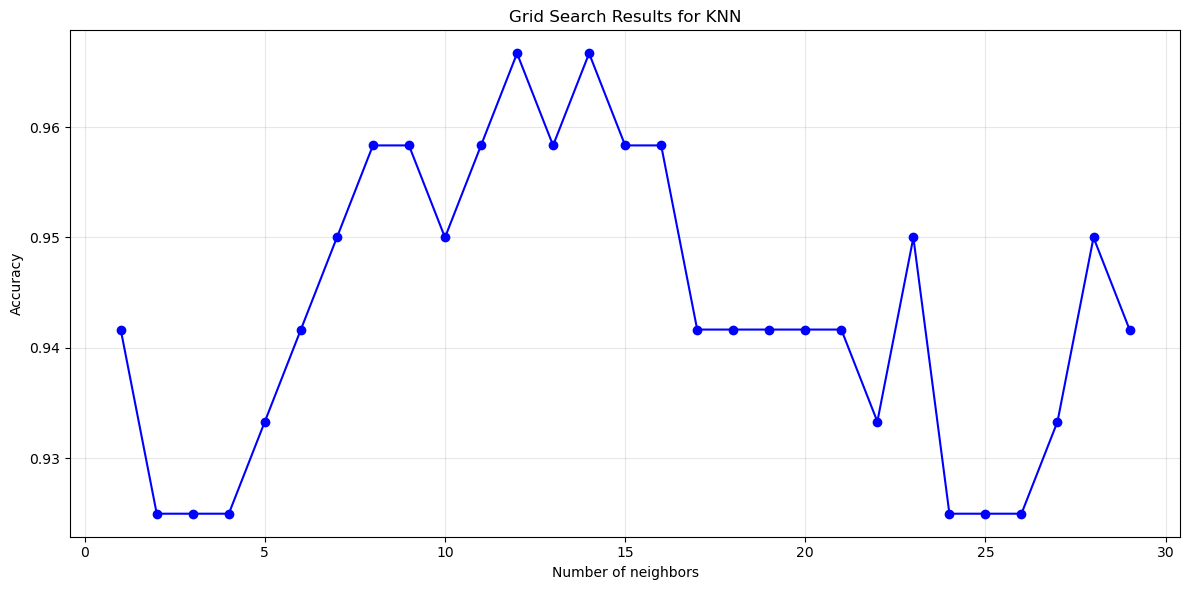

In [263]:
plt.figure(figsize=(12, 6))
plt.plot(param_grid['n_neighbors'], grid_search.cv_results_['mean_test_score'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Grid Search Results for KNN')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Финальная модель: метод GridSearch рекомендует значение K=12

# Визуализация границ принятия решений

In [264]:
from matplotlib.colors import ListedColormap

In [265]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

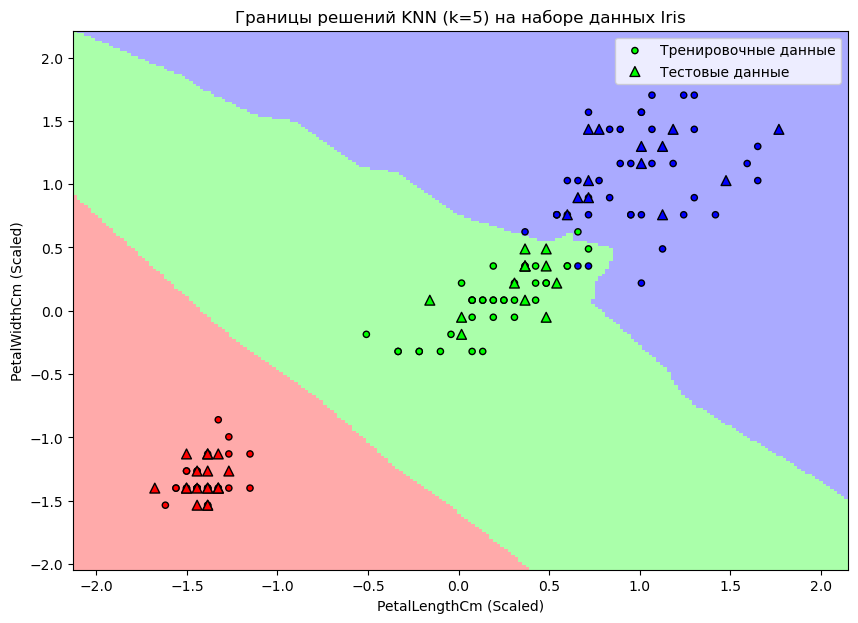

In [266]:
X = df[['PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Заменяем текстовые метки классов на числовые для совместимости с Matplotlib
# Это важно, так как цветовая карта работает с числами
class_mapping = {label: idx for idx, label in enumerate(np.unique(y))}
y_numeric = y.map(class_mapping)

# Разделение данных и масштабирование
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Обучение классификатора
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(scaled_X_train, y_train)

# Создание сетки для построения границ
x_min, x_max = scaled_X_train[:, 0].min() - 0.5, scaled_X_train[:, 0].max() + 0.5
y_min, y_max = scaled_X_train[:, 1].min() - 0.5, scaled_X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Предсказание класса для каждой точки на сетке
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Создание цветовых карт
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Визуализация границ решений
plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Нанесение тренировочных и тестовых точек на график
plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20, label='Тренировочные данные')
plt.scatter(scaled_X_test[:, 0], scaled_X_test[:, 1], c=y_test, cmap=cmap_bold,
            marker='^', edgecolor='k', s=50, label='Тестовые данные')

# Добавление названий и легенды
plt.title("Границы решений KNN (k=5) на наборе данных Iris")
plt.xlabel('PetalLengthCm (Scaled)')
plt.ylabel('PetalWidthCm (Scaled)')
plt.legend()
plt.show()

# DROP5

In [267]:
def drop5_reduction(X_train, y_train, k=5):
  
    X_train_np = X_train.values
    y_train_np = y_train.values
    n_samples = len(X_train_np)
    
    remaining_indices = list(range(n_samples))
    utilities = np.zeros(n_samples)
    
    # Эффективное вычисление полезности
    for i in range(n_samples):
        # Вычисляем расстояния до всех других точек
        distances = np.linalg.norm(X_train_np - X_train_np[i], axis=1)
        
        # Находим расстояния до соседей ДРУГОГО класса
        different_class_indices = np.where(y_train_np != y_train_np[i])[0]
        different_class_distances = distances[different_class_indices]
        
        # Берем k-ое расстояние
        if len(different_class_distances) >= k:
            different_class_distances.sort()
            utilities[i] = different_class_distances[k-1]
        else:
            utilities[i] = np.inf # Бесконечность, чтобы не удалять эти точки

    # Сортируем точки по полезности (от наименьшей к наибольшей)
    sorted_indices = np.argsort(utilities)
    
    current_indices = set(remaining_indices)
    
    for idx in sorted_indices:
        if len(current_indices) <= 1:
            break
        
        # Временно удаляем точку
        temp_indices = list(current_indices - {idx})
        temp_X = X_train_np[temp_indices]
        temp_y = y_train_np[temp_indices]
        
        # Обучаем временную модель
        temp_knn = KNeighborsClassifier(n_neighbors=k)
        temp_knn.fit(temp_X, temp_y)
        
        # Проверяем точность на оставшихся точках
        original_X = X_train_np[list(current_indices)]
        original_y = y_train_np[list(current_indices)]
        
        accuracy_without = temp_knn.score(original_X, original_y)
        accuracy_with = KNeighborsClassifier(n_neighbors=k).fit(
            original_X, original_y
        ).score(original_X, original_y)
        
        # Если точность не ухудшилась, удаляем точку
        if accuracy_without >= accuracy_with * 0.95:
            current_indices.remove(idx)
            
    reduced_indices = list(current_indices)
    return X_train.iloc[reduced_indices], y_train.iloc[reduced_indices]

In [268]:
# Сравнение разных scaler'ов
scalers = {
    'Without Scaling': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

results = []

for scaler_name, scaler in scalers.items():
    print(f"\n {scaler_name}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        # Для случая без масштабирования
        X_train_scaled = X_train.values
        X_test_scaled = X_test.values
    
    # Применение DROP5. Передаем DataFrame для сохранения индексов
    X_reduced_df, y_reduced_df = drop5_reduction(
        X_train, y_train, k=5
    )
    
    # Преобразуем сокращенные DataFrame обратно в numpy массивы для fit
    if scaler:
        X_reduced_scaled = scaler.transform(X_reduced_df)
    else:
        X_reduced_scaled = X_reduced_df.values
    
    print(f"Original size: {len(X_train)}")
    print(f"Reduced size: {len(X_reduced_df)}")
    print(f"Reduction: {100*(1-len(X_reduced_df)/len(X_train)):.1f}%")
    
    knn_original = KNeighborsClassifier(n_neighbors=5)
    knn_reduced = KNeighborsClassifier(n_neighbors=5)
    
    knn_original.fit(X_train_scaled, y_train)
    acc_original = accuracy_score(y_test, knn_original.predict(X_test_scaled))
    
    knn_reduced.fit(X_reduced_scaled, y_reduced_df)
    acc_reduced = accuracy_score(y_test, knn_reduced.predict(X_test_scaled))
    
    results.append({
        'Scaler': scaler_name,
        'Original Size': len(X_train),
        'Reduced Size': len(X_reduced_df),
        'Reduction %': 100*(1-len(X_reduced_df)/len(X_train)),
        'Accuracy Original': acc_original,
        'Accuracy Reduced': acc_reduced,
        'Accuracy Difference': acc_reduced - acc_original
    })
    
    print(f"Accuracy (original): {acc_original:.4f}")
    print(f"Accuracy (reduced): {acc_reduced:.4f}")




 Without Scaling
Original size: 105
Reduced size: 9
Reduction: 91.4%
Accuracy (original): 0.9333
Accuracy (reduced): 0.9111

 StandardScaler
Original size: 105
Reduced size: 9
Reduction: 91.4%
Accuracy (original): 0.9111
Accuracy (reduced): 0.9333

 MinMaxScaler
Original size: 105
Reduced size: 9
Reduction: 91.4%
Accuracy (original): 0.9111
Accuracy (reduced): 0.9333

 RobustScaler
Original size: 105
Reduced size: 9
Reduction: 91.4%
Accuracy (original): 0.9111
Accuracy (reduced): 0.9111


 метод DROP5 увеличивает accuracy - долю верных ответов при  StandardScaler и MinMaxScaler стандартизациях

# Быстрый поиск ближайших соседей  BallTree

In [269]:
knn_ball_tree = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_ball_tree.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree')

In [270]:
y_pred = knn_ball_tree.predict(X_test)

In [271]:
accuracy_ballTree = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_ballTree:.5f}")

Accuracy: 0.93333


In [272]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



# Быстрый поиск ближайших соседей KD_tree

In [273]:
knn_kd_tree = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')

In [274]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [275]:
accuracy_KD_tree = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_KD_tree:.5f}")

Accuracy: 0.93333


# «Навигируемые графы малого мира (HSNW)» 

In [276]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import hnswlib

In [277]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Разбиваем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=0
)

# ---- HNSW ----
dim = X_train.shape[1]     
num_elements = len(X_train)

# создаем индекс HNSW
p = hnswlib.Index(space='l2', dim=dim) 

# инициализация
p.init_index(max_elements=num_elements, ef_construction=200, M=16)

# добавляем данные
p.add_items(X_train, y_train)

# контролируем точность поиска (больше ef → выше точность, но медленнее)
p.set_ef(50)

# ---- Предсказание ----
labels, distances = p.knn_query(X_test, k=1)  # k=1 (как KNN-1)

# оценки
from sklearn.metrics import accuracy_score, classification_report

y_pred = labels.flatten()
accuracy_HSNW = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_HSNW)
print(classification_report(y_test, y_pred, target_names=encoder.classes_.astype(str)))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.87      1.00      0.93        13
           2       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.96      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30



# «Поиск схожести Facebook AI (FAISS)

In [278]:
import faiss

In [279]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = df[feature_columns].values.astype('float32')   
y = df['Species'].values

In [281]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)


dim = X_train.shape[1]  
index = faiss.IndexFlatL2(dim)  


index.add(X_train)

k = 5  
distances, indices = index.search(X_test, k)

y_pred = []
for neighbors in indices:
    neighbor_labels = y_train[neighbors]
    values, counts = np.unique(neighbor_labels, return_counts=True)
    y_pred.append(values[np.argmax(counts)])

y_pred = np.array(y_pred)

accuracy_FAISS = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_FAISS)
print(classification_report(y_test, y_pred, target_names=encoder.classes_.astype(str)))

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [282]:
print("accuracy_ballTree =", accuracy_ballTree)
print("accuracy_KD_tree  =", accuracy_KD_tree)
print("accuracy_HSNW     =", accuracy_HSNW)
print("accuracy_FAISS    =", accuracy_FAISS)

accuracy_ballTree = 0.9333333333333333
accuracy_KD_tree  = 0.9333333333333333
accuracy_HSNW     = 0.9333333333333333
accuracy_FAISS    = 0.9666666666666667
